In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Create a synthetic dataset with 20 features, but only 5 informative ones
X, y = make_classification(n_samples=1000, n_features=20, n_informative=5, n_redundant=5, 
                           n_repeated=0, n_classes=2, random_state=42)

In [3]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
# Create the RFE object with LogisticRegression as the estimator
model = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=model, n_features_to_select=5, step=1)

In [5]:
# Fit RFE
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5)

In [6]:
# Transform the data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

In [7]:
# Train a model with selected features
model.fit(X_train_rfe, y_train)

LogisticRegression(max_iter=1000)

In [8]:
# Make predictions and evaluate
y_pred = model.predict(X_test_rfe)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with 5 selected features: {accuracy:.4f}")

Accuracy with 5 selected features: 0.8067


In [9]:
# Get feature ranking
print("\nFeature Ranking (1 = selected, 0 = eliminated):")
for i, rank in enumerate(rfe.ranking_):
    status = "Selected" if rank == 1 else "Eliminated"
    print(f"Feature {i}: {status} (Rank: {rank})")


Feature Ranking (1 = selected, 0 = eliminated):
Feature 0: Eliminated (Rank: 2)
Feature 1: Eliminated (Rank: 9)
Feature 2: Eliminated (Rank: 11)
Feature 3: Eliminated (Rank: 12)
Feature 4: Eliminated (Rank: 10)
Feature 5: Selected (Rank: 1)
Feature 6: Selected (Rank: 1)
Feature 7: Eliminated (Rank: 4)
Feature 8: Eliminated (Rank: 13)
Feature 9: Selected (Rank: 1)
Feature 10: Eliminated (Rank: 5)
Feature 11: Eliminated (Rank: 3)
Feature 12: Eliminated (Rank: 8)
Feature 13: Selected (Rank: 1)
Feature 14: Eliminated (Rank: 15)
Feature 15: Eliminated (Rank: 14)
Feature 16: Eliminated (Rank: 6)
Feature 17: Eliminated (Rank: 7)
Feature 18: Selected (Rank: 1)
Feature 19: Eliminated (Rank: 16)


In [10]:
# Let's visualize the selected features
selected_features = np.where(rfe.support_)[0]
print(f"\nSelected features: {selected_features}")


Selected features: [ 5  6  9 13 18]


In [11]:
# Compare with using all features
full_model = LogisticRegression(max_iter=1000)
full_model.fit(X_train, y_train)
full_pred = full_model.predict(X_test)
full_accuracy = accuracy_score(y_test, full_pred)
print(f"\nAccuracy with all 20 features: {full_accuracy:.4f}")


Accuracy with all 20 features: 0.8333


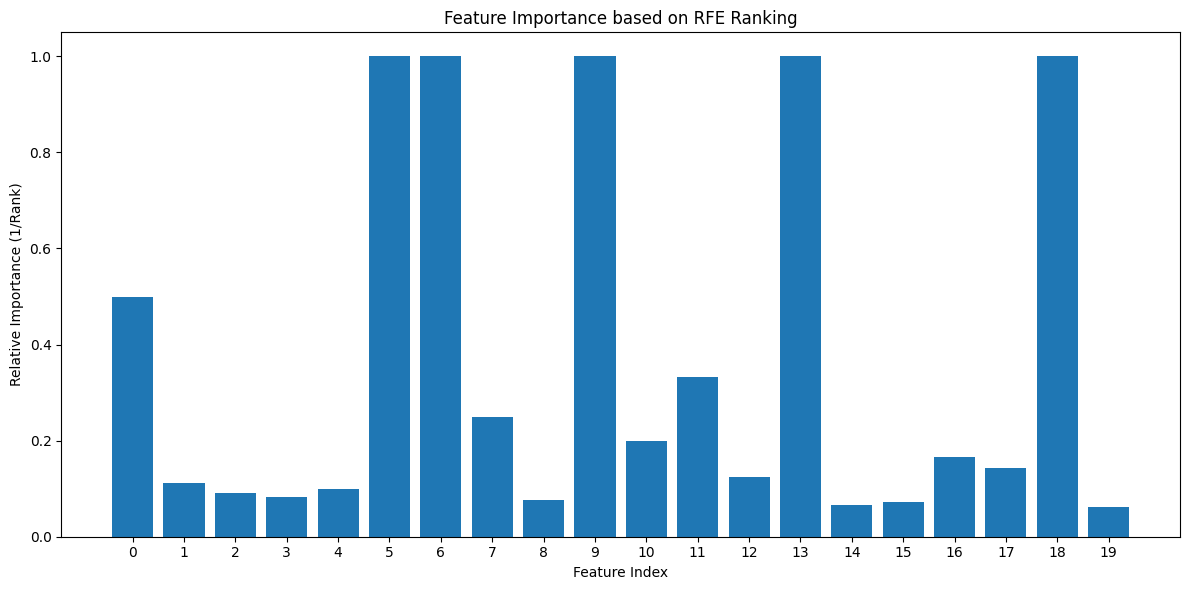

In [12]:
# Plot feature importance
plt.figure(figsize=(12, 6))
plt.bar(range(len(rfe.ranking_)), [1/r if r > 0 else 0 for r in rfe.ranking_])
plt.xlabel('Feature Index')
plt.ylabel('Relative Importance (1/Rank)')
plt.title('Feature Importance based on RFE Ranking')
plt.xticks(range(len(rfe.ranking_)))
plt.tight_layout()
plt.show()